# Airlines Delay Prediction using ML Algorithms

## In this project I'm going to do 
### 1.Import Libraries
### 2.Exploratory Data Analysis
### 3.Data Preprocessing
### 4.Check the Class Value
### 5.Check the Outliers
### 6.Attribute Correlation
### 7.Decision Tree Classifier Algorithm
### 8.Random Forest Classifier Algorithm
### 9.Logistic Regression Classifier Algorithm
### 10.XBGoost Classifier Algorithm
### 11.AdaBoost Classifier Algorithm
### 12.Visualize Random Forest Classifier
### 13.ROC Curve Visualize
### 14.Top Feature Importance each Attributes

# 1. Import libraries

In [167]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(color_codes= True)

import warnings
warnings.filterwarnings('ignore')


In [168]:
df = pd.read_csv("airlines_delay.csv")
df.head()

,Flight,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
0,2313.0,1296.0,141.0,DL,ATL,HOU,1,0
1,6948.0,360.0,146.0,OO,COS,ORD,4,0
2,1247.0,1170.0,143.0,B6,BOS,CLT,3,0
3,31.0,1410.0,344.0,US,OGG,PHX,6,0
4,563.0,692.0,98.0,FL,BMI,ATL,4,0


In [169]:
df.shape

(539382, 8)

In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539382 entries, 0 to 539381
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Flight       539382 non-null  float64
 1   Time         539382 non-null  float64
 2   Length       539382 non-null  float64
 3   Airline      539382 non-null  object 
 4   AirportFrom  539382 non-null  object 
 5   AirportTo    539382 non-null  object 
 6   DayOfWeek    539382 non-null  int64  
 7   Class        539382 non-null  int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 32.9+ MB


In [171]:
df.describe(include = "all")

,Flight,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
count,539382.000000,539382.000000,539382.000000,539382,539382,539382,539382.000000,539382.000000
unique,NaN,NaN,NaN,18,293,293,NaN,NaN
top,NaN,NaN,NaN,WN,ATL,ATL,NaN,NaN
freq,NaN,NaN,NaN,94097,34449,34440,NaN,NaN
mean,2427.927988,802.728161,132.202104,NaN,NaN,NaN,3.929666,0.445443
std,2067.431700,278.045546,70.117045,NaN,NaN,NaN,1.914666,0.497015
min,1.000000,10.000000,0.000000,NaN,NaN,NaN,1.000000,0.000000
25%,712.000000,565.000000,81.000000,NaN,NaN,NaN,2.000000,0.000000
50%,1809.000000,795.000000,115.000000,NaN,NaN,NaN,4.000000,0.000000
75%,3745.000000,1035.000000,162.000000,NaN,NaN,NaN,5.000000,1.000000


In [172]:
df.nunique()

Flight         6585
Time           1131
Length          426
Airline          18
AirportFrom     293
AirportTo       293
DayOfWeek         7
Class             2
dtype: int64

# 2. Exploratory Data Analysis

<Axes: xlabel='Airline', ylabel='count'>

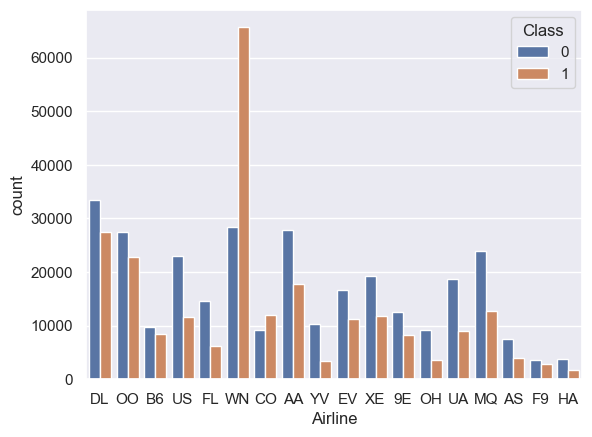

In [173]:
sns.countplot(data=df, x='Airline', hue='Class')

# WN Airline is the only airline that often delayed than other airlines

<Axes: xlabel='Airline', ylabel='Length'>

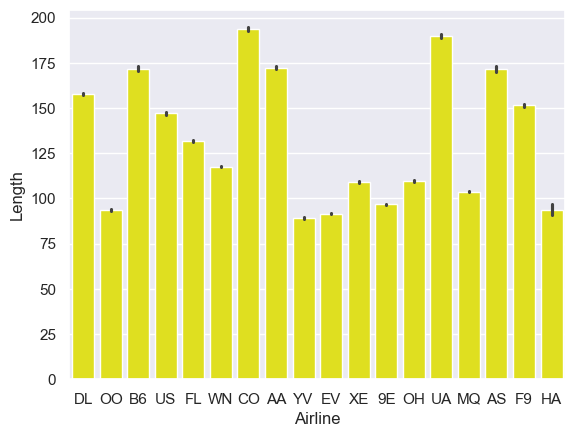

In [174]:
sns.barplot(data=df, x='Airline', y='Length', color='yellow')

# CO and UA are the longest average flight time

<Axes: xlabel='Airline', ylabel='Time'>

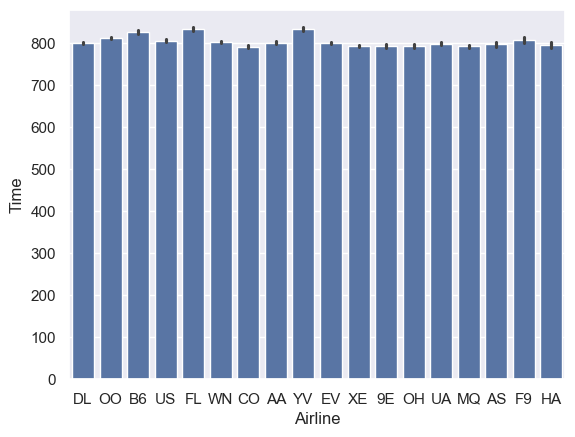

In [175]:
sns.barplot(df, x='Airline', y='Time')

# Almost all of the airplane have the same departure 

# 3. Data Preprocessing

In [176]:
# Remove Flight ID
df = df.drop('Flight', axis=1)
df.head()

,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
0,1296.0,141.0,DL,ATL,HOU,1,0
1,360.0,146.0,OO,COS,ORD,4,0
2,1170.0,143.0,B6,BOS,CLT,3,0
3,1410.0,344.0,US,OGG,PHX,6,0
4,692.0,98.0,FL,BMI,ATL,4,0


In [177]:
# length value convert to integer
df['Length'] = df['Length'].astype(int)
print(df)

          Time  Length Airline AirportFrom AirportTo  DayOfWeek  Class
0       1296.0     141      DL         ATL       HOU          1      0
1        360.0     146      OO         COS       ORD          4      0
2       1170.0     143      B6         BOS       CLT          3      0
3       1410.0     344      US         OGG       PHX          6      0
4        692.0      98      FL         BMI       ATL          4      0
...        ...     ...     ...         ...       ...        ...    ...
539377   530.0      72      OO         GEG       SEA          5      1
539378   560.0     115      WN         LAS       DEN          4      1
539379   827.0      74      EV         CAE       ATL          2      1
539380   715.0      65      WN         BWI       BUF          4      1
539381   770.0      55      OO         CPR       DEN          2      1

[539382 rows x 7 columns]


In [178]:
df['Airline'].unique()

array(['DL', 'OO', 'B6', 'US', 'FL', 'WN', 'CO', 'AA', 'YV', 'EV', 'XE',
       '9E', 'OH', 'UA', 'MQ', 'AS', 'F9', 'HA'], dtype=object)

In [179]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Airline'] = le.fit_transform(df['Airline'])
df['Airline'].unique()


array([ 5, 12,  3, 14,  8, 15,  4,  1, 17,  6, 16,  0, 11, 13, 10,  2,  7,
        9])

In [180]:
df['AirportFrom'] = le.fit_transform(df['AirportFrom'])
df['AirportFrom'].unique()

array([ 16,  65,  35, 203,  32, 198,  96,  80,  45,  69, 160,  29,  60,
       135, 154, 147, 245,  58, 104, 243,  27, 238,  85, 269,  18,  78,
       217,  97, 139, 148, 208, 213, 253, 183,  84, 261, 216,  46, 117,
       171, 246, 285, 197,  79, 244,  43, 234, 252, 214, 153, 134, 128,
        22, 192, 225,  67, 264, 268,  71, 221, 132, 254, 233, 177, 150,
        91, 260, 146,  10, 159, 241, 174, 124, 184,  47, 119,  99, 162,
       205,  33,  94, 231, 204, 143, 258, 173, 155,  70, 202, 215,   2,
       262, 101,   1, 196, 178, 111, 195, 277,  76, 236, 228,  12,  53,
       207, 161, 227, 152, 157, 290, 114,  61, 120, 224, 273,  19, 182,
       118, 172, 283, 165,   0, 167,  92,  75,  14, 280, 237, 191, 149,
       248,  50, 279, 107, 106,  42, 102, 115, 230, 175, 109,  44, 223,
       240, 129,  34,  68,  38,  17, 256, 263, 232, 209, 116, 151, 136,
       242,  48, 137, 193, 288,  54, 170, 130,  20,  21, 278, 121, 126,
       188,  93,  13, 181, 141,  56, 190,  26, 267, 187,  89, 15

In [181]:
df['AirportTo'] = le.fit_transform(df['AirportTo'])
df['AirportTo'].unique()

array([129, 208,  60, 217,  16,  27,  80, 177, 119, 213, 173, 253,  79,
       292,  45, 130,  96, 148, 184, 202, 135,  58, 273, 260,  22, 243,
        85, 227,  78, 159, 268, 101, 197,  43, 153, 255, 261, 114, 154,
       288,  99, 235,  35,  14, 264, 207, 236, 147, 121,  71, 277, 252,
       157, 262,  47, 269,  76, 175, 241, 143, 134, 136, 128, 183,  69,
       233, 182, 100,  48,  65,  75, 285, 216,   1, 190, 251, 245, 174,
       162, 279,   6,  33, 172, 198, 104, 228, 204,  87, 215,  18, 234,
       161,   2, 146, 221,  32,  42, 230, 194,  70, 256,  98, 258, 218,
       247, 139, 254,   5, 267, 238,  53, 145, 244, 109, 205, 214,  61,
       229,  56, 278, 209, 122, 280, 181,  44, 188,  51, 274, 171,  84,
       131, 158,  91,  10,  67, 155, 200,  12,  66, 166,  52, 187, 111,
        21, 179,  41, 103, 151, 224, 120, 203, 195, 116, 223, 232,  46,
        82,  68, 283, 150, 193, 170, 275, 290,  72, 248,  24,  83, 289,
        81, 266,  13,  88,  23, 102,  93,  94,  19, 132, 219, 18

In [182]:
df.head()

,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
0,1296.0,141,5,16,129,1,0
1,360.0,146,12,65,208,4,0
2,1170.0,143,3,35,60,3,0
3,1410.0,344,14,203,217,6,0
4,692.0,98,8,32,16,4,0


# 4. Check the Class Value

In [183]:
df['Class'].value_counts()

Class
0    299118
1    240264
Name: count, dtype: int64

<Axes: xlabel='Class', ylabel='count'>

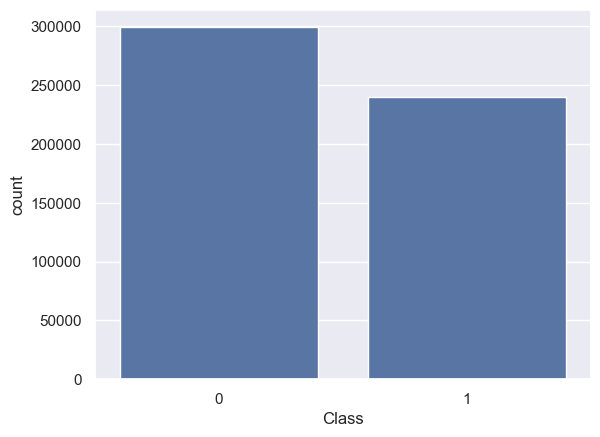

In [184]:
import seaborn as sns
sns.countplot(x=df['Class'])

In [185]:
from sklearn.utils import resample

# create two different dataframe of majority and minority class
df_majority = df[(df['Class']==0)]
df_minority = df[(df['Class']==1)]

# upsample minority class
df_minority_upsampled = resample(df_minority,
                                replace=True,      # sample with replacement
                                n_samples= 299118, # to match majority class
                                random_state= 0)   # reproducible results

# combine majority class with unsampled minority class
df_upsampled = pd.concat([df_minority_upsampled, df_majority])

In [186]:
df_upsampled['Class'].value_counts()


Class
1    299118
0    299118
Name: count, dtype: int64

<Axes: xlabel='Class', ylabel='count'>

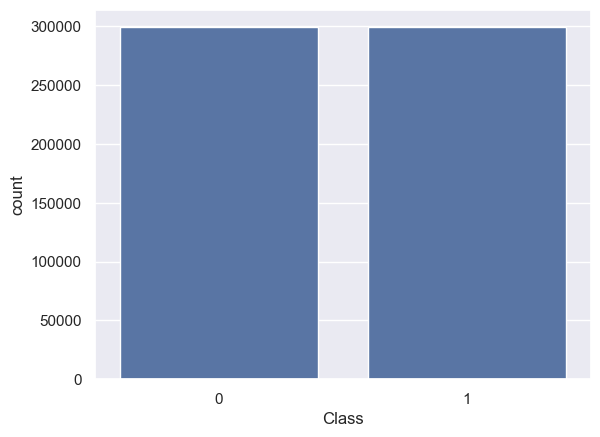

In [187]:
sns.countplot(x=df_upsampled['Class'])

# 5. Check the Outliers

In [188]:
print(df.dtypes)

Time           float64
Length           int32
Airline          int32
AirportFrom      int32
AirportTo        int32
DayOfWeek        int64
Class            int64
dtype: object


In [189]:
# remove outlier using z-score method
import scipy.stats as stats
numeric_df = df_upsampled.select_dtypes(include=np.number)
z = np.abs(stats.zscore(numeric_df))
data_clean = df_upsampled[(z <= 3).all(axis=1)]

print(data_clean.shape)

(587262, 7)


# 6. Attribute Correlation

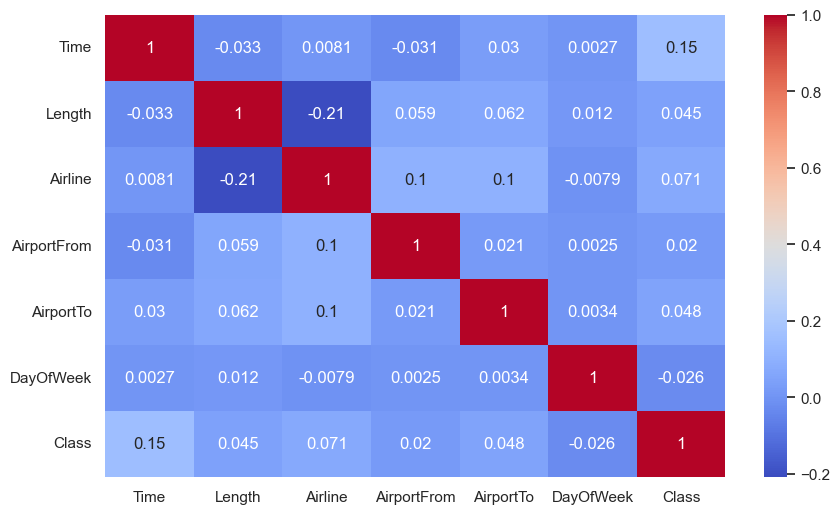

In [190]:
# Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data_clean.corr(numeric_only=True), annot=True, fmt='.2g', cmap='coolwarm')
plt.show()

# Train and Test Data Split

In [191]:
X = data_clean.drop('Class', axis=1)
y = data_clean['Class']

In [192]:
# train size 80% and test size 20%
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

# 7. Decision Tree Classifier

In [193]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [194]:
y_pred = dt.predict(X_test)
print("Accuracy:", accuracy_score(y_test,y_pred))
print("Confusion_Matrix:\n",confusion_matrix(y_test,y_pred))
print("Classification Report:\n",classification_report(y_test,y_pred))

Accuracy: 0.6808766059615335
Confusion_Matrix:
 [[41145 17709]
 [19773 38826]]
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.70      0.69     58854
           1       0.69      0.66      0.67     58599

    accuracy                           0.68    117453
   macro avg       0.68      0.68      0.68    117453
weighted avg       0.68      0.68      0.68    117453



# 8. Random Forest Classifier

In [195]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [196]:
y_pred = rfc.predict(X_test)
print("Accuracy:", accuracy_score(y_test,y_pred))
print("Confusion_Matrix:\n",confusion_matrix(y_test,y_pred))
print("Classification Report:\n",classification_report(y_test,y_pred))

Accuracy: 0.6988667807548551
Confusion_Matrix:
 [[39368 19486]
 [15883 42716]]
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.67      0.69     58854
           1       0.69      0.73      0.71     58599

    accuracy                           0.70    117453
   macro avg       0.70      0.70      0.70    117453
weighted avg       0.70      0.70      0.70    117453



# 9. Logistic Regression

In [197]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=0)
lr.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [198]:
y_pred = lr.predict(X_test)
print("Accuracy:", accuracy_score(y_test,y_pred))
print("Confusion_Matrix:\n",confusion_matrix(y_test,y_pred))
print("Classification Report:\n",classification_report(y_test,y_pred))

Accuracy: 0.5751747507513644
Confusion_Matrix:
 [[34139 24715]
 [25182 33417]]
Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.58      0.58     58854
           1       0.57      0.57      0.57     58599

    accuracy                           0.58    117453
   macro avg       0.58      0.58      0.58    117453
weighted avg       0.58      0.58      0.58    117453



# 10. XGBoost 

In [199]:
from xgboost  import XGBClassifier
xgb = XGBClassifier(random_state=0)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [200]:
y_pred = xgb.predict(X_test)
print("Accuracy:", accuracy_score(y_test,y_pred))
print("Confusion_Matrix:\n",confusion_matrix(y_test,y_pred))
print("Classification Report:\n",classification_report(y_test,y_pred))

Accuracy: 0.6593105327237277
Confusion_Matrix:
 [[41052 17802]
 [22213 36386]]
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.70      0.67     58854
           1       0.67      0.62      0.65     58599

    accuracy                           0.66    117453
   macro avg       0.66      0.66      0.66    117453
weighted avg       0.66      0.66      0.66    117453



# 11. Adaboost Classifier

In [201]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(random_state=0)
ada.fit(X_train, y_train)

AdaBoostClassifier(random_state=0)

In [202]:
y_pred = ada.predict(X_test)
print("Accuracy:", accuracy_score(y_test,y_pred))
print("Confusion_Matrix:\n",confusion_matrix(y_test,y_pred))
print("Classification Report:\n",classification_report(y_test,y_pred))

Accuracy: 0.6237729134206874
Confusion_Matrix:
 [[37867 20987]
 [23202 35397]]
Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.64      0.63     58854
           1       0.63      0.60      0.62     58599

    accuracy                           0.62    117453
   macro avg       0.62      0.62      0.62    117453
weighted avg       0.62      0.62      0.62    117453



# 12. Visualize Random Forest Classifier

Text(0.5, 1.0, 'Accuracy Score: 69.8866780754855')

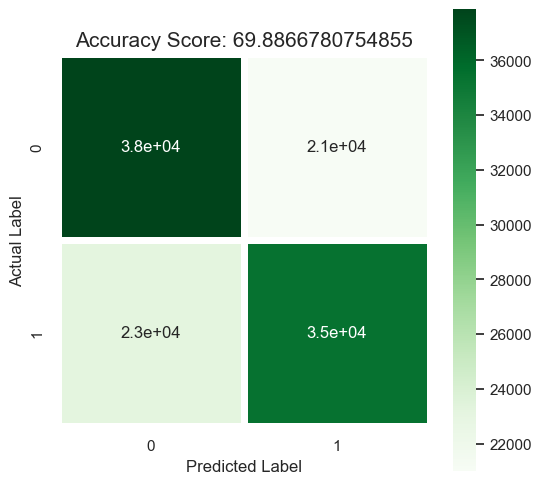

In [203]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,6))
sns.heatmap(data=cm, linewidths=5, annot=True, square=True, cmap='Greens')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
all_sample_title = 'Accuracy Score: {0}'.format(rfc.score(X_test, y_test)*100)
plt.title(all_sample_title, size=15)

# 13. ROC Curve Visualize

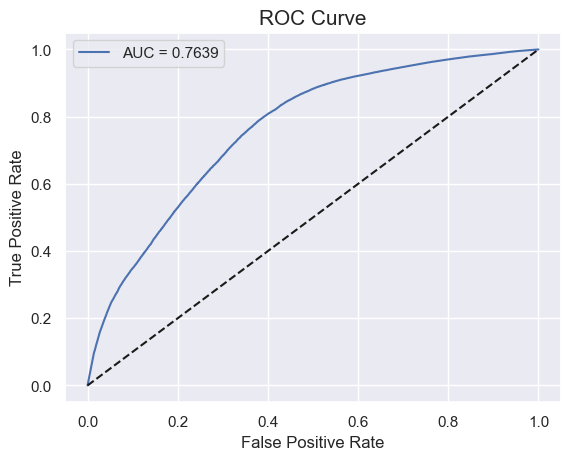

In [204]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = rfc.predict_proba(X_test)[:][:,1]
df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index
fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', size = 15)
plt.legend()

# 14. Top feature importance of each Attributes

In [207]:
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": rfc.feature_importances_
})
fi = imp_df.sort_values(by='Importance', ascending=False)
fi

,Feature Name,Importance
0,Time,0.264537
5,DayOfWeek,0.239242
1,Length,0.177447
3,AirportFrom,0.110214
2,Airline,0.108437
4,AirportTo,0.100123


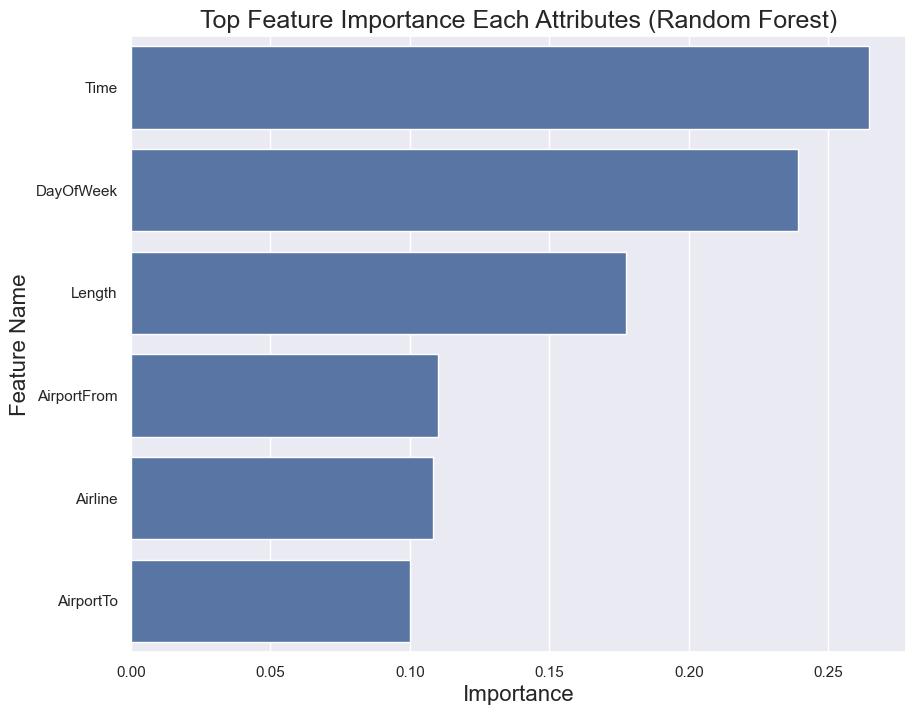

In [208]:
fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Top Feature Importance Each Attributes (Random Forest)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()